# Face Recogniction CNN Model

## 0. Importing PyTorch Modules and setting up device

In [1]:
import os
import torch
import helper_funcs as hlp
from pathlib import Path
from torch import nn
from torchinfo import summary
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print('PyTorch Version: ', torch.__version__)
print('Current Device: ', device)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch Version:  2.3.1+cpu
Current Device:  cpu


## 1. Load Dataset

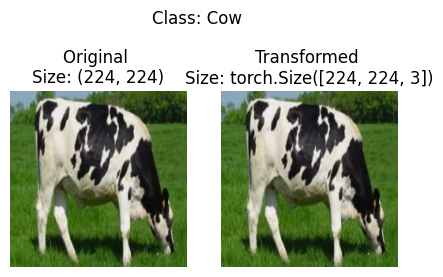

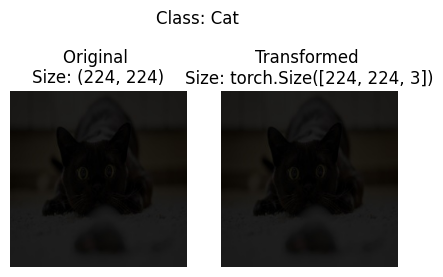

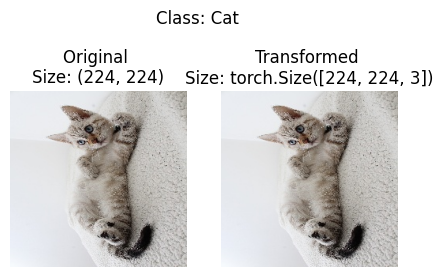

In [2]:
# Determine Image Size
IMAGE_SIZE = (224, 224)

# Set Train and Test Directories
root_dir  = Path('animal_data_simple')
train_dir = root_dir / "train"
test_dir  = root_dir / 'test'


# Define Image Transformer
simple_transform = transforms.Compose([transforms.Resize(size=IMAGE_SIZE), transforms.ToTensor()])

images_list = list(root_dir.glob("*/*/*.jpg"))
images_list.extend(root_dir.glob("*/*/*.jpeg"))


# Plot Images after transforming
hlp.plot_transformed_images(image_paths=images_list, transform=simple_transform, n=3)

In [3]:
# Get Train and Test data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [4]:
IN_CHANNELS     = 3   # Color Channels
HIDDEN_UNITS    = 128
OUTPUT_SHAPE = len(train_data_simple.classes)

simple_model = nn.Sequential(
    nn.Conv2d(in_channels=IN_CHANNELS, out_channels=HIDDEN_UNITS, kernel_size=3, stride=1,  padding=1), 
    nn.ReLU(),
    nn.Conv2d(in_channels=HIDDEN_UNITS, out_channels=HIDDEN_UNITS, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(HIDDEN_UNITS, HIDDEN_UNITS, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(HIDDEN_UNITS, HIDDEN_UNITS, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(in_features=HIDDEN_UNITS*56*56, out_features=OUTPUT_SHAPE)
).to(device)

simple_model

Sequential(
  (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Flatten(start_dim=1, end_dim=-1)
  (11): Linear(in_features=401408, out_features=3, bias=True)
)

In [5]:
# Verify Model using torchinfo.summary
summary(simple_model, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 3]                    --
├─Conv2d: 1-1                            [1, 128, 224, 224]        3,584
├─ReLU: 1-2                              [1, 128, 224, 224]        --
├─Conv2d: 1-3                            [1, 128, 224, 224]        147,584
├─ReLU: 1-4                              [1, 128, 224, 224]        --
├─MaxPool2d: 1-5                         [1, 128, 112, 112]        --
├─Conv2d: 1-6                            [1, 128, 112, 112]        147,584
├─ReLU: 1-7                              [1, 128, 112, 112]        --
├─Conv2d: 1-8                            [1, 128, 112, 112]        147,584
├─ReLU: 1-9                              [1, 128, 112, 112]        --
├─MaxPool2d: 1-10                        [1, 128, 56, 56]          --
├─Flatten: 1-11                          [1, 401408]               --
├─Linear: 1-12                           [1, 3]                    

In [6]:
# Number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=simple_model.parameters(), lr=0.001)

simple_model_results = hlp.train_model(model=simple_model, train_dataloader=train_dataloader_simple, test_dataloader=test_dataloader_simple, 
                                       optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

 10%|█         | 1/10 [01:35<14:18, 95.43s/it]

Epoch: 1 | train_loss: 2.3439 | train_acc: 0.3454 | test_loss: 1.1017 | test_acc: 0.3299


 20%|██        | 2/10 [03:09<12:38, 94.85s/it]

Epoch: 2 | train_loss: 1.0982 | train_acc: 0.3627 | test_loss: 1.1063 | test_acc: 0.2292


 30%|███       | 3/10 [04:45<11:05, 95.01s/it]

Epoch: 3 | train_loss: 1.1021 | train_acc: 0.3821 | test_loss: 1.1147 | test_acc: 0.2188


 40%|████      | 4/10 [06:19<09:28, 94.71s/it]

Epoch: 4 | train_loss: 1.0890 | train_acc: 0.3446 | test_loss: 1.1122 | test_acc: 0.2812


 50%|█████     | 5/10 [07:53<07:53, 94.63s/it]

Epoch: 5 | train_loss: 1.0393 | train_acc: 0.4854 | test_loss: 1.1769 | test_acc: 0.2708


 60%|██████    | 6/10 [09:28<06:18, 94.68s/it]

Epoch: 6 | train_loss: 0.9621 | train_acc: 0.5319 | test_loss: 1.0970 | test_acc: 0.3403


 70%|███████   | 7/10 [11:05<04:46, 95.36s/it]

Epoch: 7 | train_loss: 0.9070 | train_acc: 0.5542 | test_loss: 1.1136 | test_acc: 0.3727


 80%|████████  | 8/10 [12:42<03:12, 96.03s/it]

Epoch: 8 | train_loss: 0.9404 | train_acc: 0.5583 | test_loss: 1.1053 | test_acc: 0.4178


 90%|█████████ | 9/10 [14:18<01:36, 96.05s/it]

Epoch: 9 | train_loss: 0.8370 | train_acc: 0.6104 | test_loss: 1.2199 | test_acc: 0.4039


100%|██████████| 10/10 [15:53<00:00, 95.31s/it]

Epoch: 10 | train_loss: 0.8490 | train_acc: 0.6065 | test_loss: 1.1170 | test_acc: 0.4444


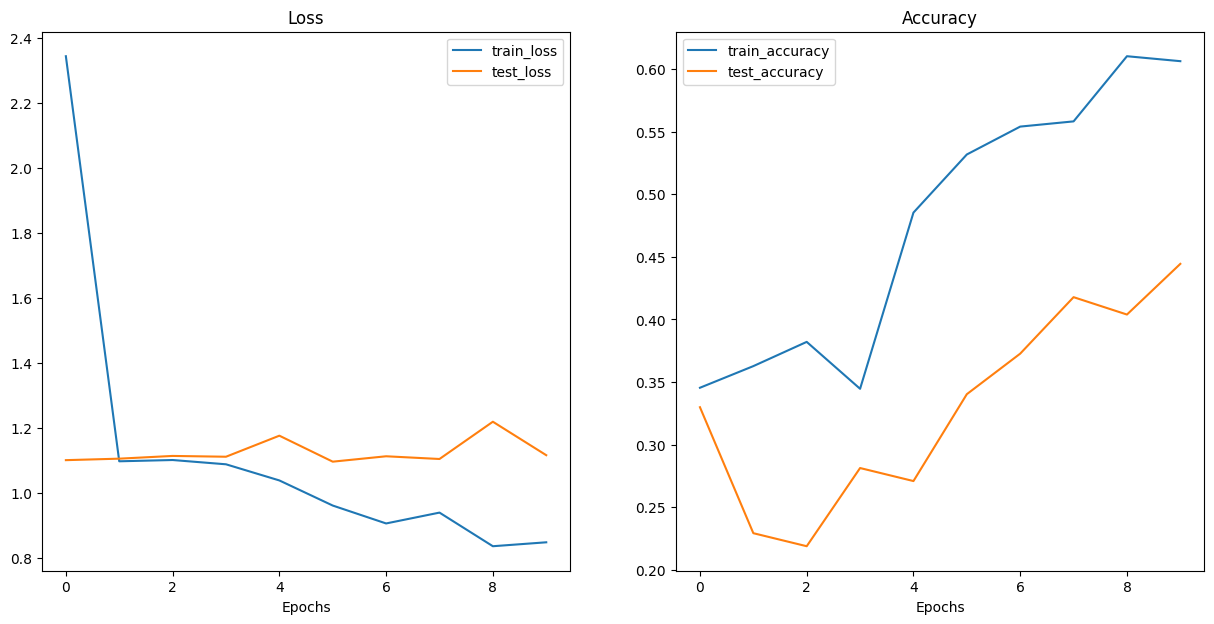

In [8]:
hlp.plot_loss_curves(simple_model_results)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005965557..1.0000001].


Yehia tensor([[[0.3020, 0.2980, 0.2941,  ..., 0.3098, 0.3098, 0.3137],
         [0.2902, 0.2941, 0.2941,  ..., 0.3176, 0.3137, 0.3098],
         [0.2784, 0.2824, 0.2941,  ..., 0.3294, 0.3137, 0.3098],
         ...,
         [0.1608, 0.1216, 0.1569,  ..., 0.5176, 0.4824, 0.4510],
         [0.1608, 0.1647, 0.2471,  ..., 0.4824, 0.4471, 0.4157],
         [0.2196, 0.2275, 0.3020,  ..., 0.4431, 0.4157, 0.3882]],

        [[0.4275, 0.4235, 0.4196,  ..., 0.5020, 0.5020, 0.5059],
         [0.4157, 0.4196, 0.4196,  ..., 0.5098, 0.5059, 0.5020],
         [0.4118, 0.4157, 0.4275,  ..., 0.5137, 0.5059, 0.5020],
         ...,
         [0.3294, 0.2824, 0.3059,  ..., 0.6314, 0.6157, 0.5882],
         [0.3373, 0.3333, 0.4000,  ..., 0.6314, 0.6118, 0.5961],
         [0.3686, 0.3804, 0.4510,  ..., 0.6000, 0.5882, 0.5843]],

        [[0.1020, 0.0980, 0.0863,  ..., 0.0824, 0.0824, 0.0863],
         [0.0902, 0.0941, 0.0863,  ..., 0.0902, 0.0863, 0.0824],
         [0.0745, 0.0784, 0.0902,  ..., 0.0980, 0.08

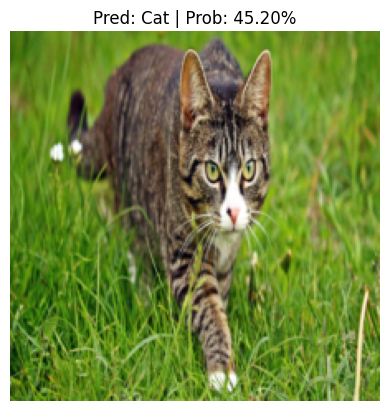

In [29]:
# Pred on our custom image
IMAGE_PATH_EXTRA = Path('animal_data_extra') / 'cat3.jpg'
class_names = train_data_simple.classes
custom_image_transform = transforms.Compose([transforms.Resize(IMAGE_SIZE),])

hlp.pred_and_plot_image(model=simple_model, image_path=IMAGE_PATH_EXTRA, class_names=class_names, transform=custom_image_transform, device=device)